In [163]:
import awkward as ak
import matplotlib.pyplot as plt
import hist
import numpy as np
import vector
import os

import pylhe

In [164]:
import seaborn as sns
colors = sns.color_palette("colorblind", 8)

In [165]:
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451)]

## General parameters

In [166]:
lumi = 13.3e3 #luminosity in inverse picobars

In [167]:
num_bins = 50
max_bins = 800

## Functions to read from event files and produce histograms

In [168]:
def read_sigma_nevents(dirname):
    filename = dirname + dirname.split('/')[-2]+'_tag_1_banner.txt'
    with open(filename,'r') as f:
        data = f.readlines()
    f.close()
    sigma = float(data[-4].split(' ')[-1])
    nevents = float(data[-5].split(' ')[-1])
    return sigma, nevents

In [173]:
def produce_histogram(dirname, scale):
    
    pylhe.register_awkward()
    
    filename = dirname + 'unweighted_events.lhe'
    arr = pylhe.to_awkward(pylhe.read_lhe_with_attributes(filename))
    
    sigma, nevents = read_sigma_nevents(dirname)
    ww = sigma*lumi/nevents
    
    leading_pt = np.zeros(int(nevents))
    for i in range(0,int(nevents),1):
        leading_pt[i] = max(arr.particles.vector[i,2].pt, arr.particles.vector[i,3].pt)
                           
    axis0 = hist.axis.Regular(bins=num_bins, start=0, stop=max_bins, name="p_T")
    storage = hist.storage.Weight()
    hist0 = hist.Hist(axis0, storage=storage)
    hist0.fill(leading_pt, weight=ww*scale)
    
    return hist0

## Set directories

In [174]:
# SM pp->ttbar
dir_ttbar = os.path.expanduser('~/Documents/MadGraph/pptt/Events/run_01/')
# pp -> ttbar+ax, m_a = 1MeV
dir_ttbaraxM1MeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_01/')
# pp -> ttbar+ax, m_a = 1keV
dir_ttbaraxM1keV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_07/')
# pp -> ttbar+ax, m_a = 1TeV
dir_ttbaraxM1TeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_08/')
# pp -> ttbar+ax, m_a = 1eV
dir_ttbaraxM1eV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_09/')
# pp -> ttbar+ax, m_a = 10keV
dir_ttbaraxM10eV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_10/')
# pp -> ttbar+ax, m_a = 100keV
dir_ttbaraxM100eV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_11/')
# pp -> ttbar+ax, m_a = 10MeV
dir_ttbaraxM10MeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_12/')
# pp -> ttbar+ax, m_a = 100MeV
dir_ttbaraxM100MeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_13/')
# pp -> ttbar+ax, m_a = 500MeV
dir_ttbaraxM500MeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_14/')
# pp -> ttbar+ax, m_a = 900MeV
dir_ttbaraxM900MeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_15/')
# pp -> ttbar+ax, m_a = 1GeV
dir_ttbaraxM1GeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_16/')
# pp -> ttbar+ax, m_a = 10GeV
dir_ttbaraxM10GeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_17/')
# pp -> ttbar+ax, m_a = 100GeV
dir_ttbaraxM100GeV = os.path.expanduser('~/Documents/MadGraph/ppttax/Events/run_18/')

## Large mass window

In [175]:
hist0 = produce_histogram(dir_ttbar, 1) # SM
hist1 = produce_histogram(dir_ttbaraxM1keV, 1e5) # 1 keV
hist2 = produce_histogram(dir_ttbaraxM1MeV, 1e5) # 1 MeV
hist3 = produce_histogram(dir_ttbaraxM1GeV, 1e5) # 1 GeV
hist4 = produce_histogram(dir_ttbaraxM1TeV, 1e7) # 1 TeV

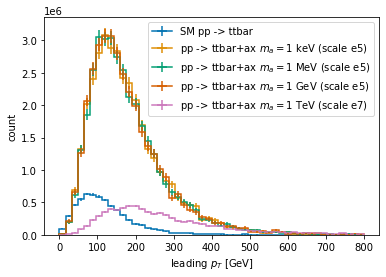

In [176]:
artists0 = hist0.plot1d(label='SM pp -> ttbar', color = colors[0]);
artists1 = hist1.plot1d(label='pp -> ttbar+ax $m_a = 1$ keV (scale e5)', color = colors[1]);
artists2 = hist2.plot1d(label='pp -> ttbar+ax $m_a = 1$ MeV (scale e5)', color = colors[2]);
artists3 = hist3.plot1d(label='pp -> ttbar+ax $m_a = 1$ GeV (scale e5)', color = colors[3]);
artists4 = hist4.plot1d(label='pp -> ttbar+ax $m_a = 1$ TeV (scale e7)', color = colors[4]);

ax = artists0[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("leading $p_T$ [GeV]");
ax.set_ylabel("count");
ax.legend()

Between 1eV and 1GeV the cross section and thus the curves do almost not change at all. This also implies that for $m_a \le 1 GeV$ the derived constraints will be basically independent of the axion mass.
For 1 TeV a suppresion is visible. We will investigate next what happens between 1 GeV and 1 TeV.

## Smaller mass window between $m_a = 1$ GeV and $m_a = 1$ TeV

In [177]:
hist0 = produce_histogram(dir_ttbar, 1) # SM
hist1 = produce_histogram(dir_ttbaraxM1GeV, 1e5) # 1 GeV
hist2 = produce_histogram(dir_ttbaraxM10GeV, 1e5) # 10 GeV
hist3 = produce_histogram(dir_ttbaraxM100GeV, 1e5) # 100 GeV
hist4 = produce_histogram(dir_ttbaraxM1TeV, 1e7) # 1 TeV

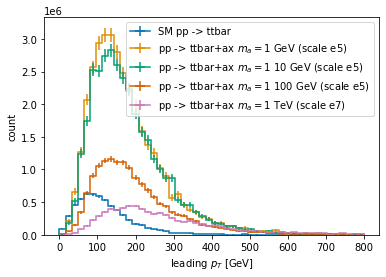

In [178]:
artists0 = hist0.plot1d(label='SM pp -> ttbar', color = colors[0]);
artists1 = hist1.plot1d(label='pp -> ttbar+ax $m_a = 1$ GeV (scale e5)', color = colors[1]);
artists2 = hist2.plot1d(label='pp -> ttbar+ax $m_a = 1$ 10 GeV (scale e5)', color = colors[2]);
artists3 = hist3.plot1d(label='pp -> ttbar+ax $m_a = 1$ 100 GeV (scale e5)', color = colors[3]);
artists4 = hist4.plot1d(label='pp -> ttbar+ax $m_a = 1$ TeV (scale e7)', color = colors[4]);

ax = artists0[0].stairs.axes;
ax.set_yscale("linear");
ax.set_xlabel("leading $p_T$ [GeV]");
ax.set_ylabel("count");
ax.legend()

The curves are easy to distinguish now as the cross section changes.